In [4]:
import pandas as pd


In [9]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [10]:
df.shape

(95662, 16)

In [17]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [18]:
df['transaction_date'] = pd.to_datetime(df['TransactionStartTime'])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_date
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018-11-15 02:18:49+00:00
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018-11-15 02:19:08+00:00
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018-11-15 02:44:21+00:00
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018-11-15 03:32:55+00:00
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018-11-15 03:34:21+00:00


<Axes: xlabel='transaction_date'>

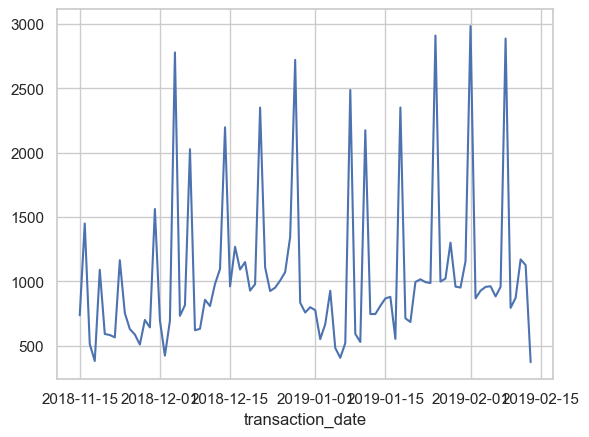

In [22]:
df['transaction_date'].dt.date.value_counts().sort_index().plot()

In [29]:
df['CustomerId'].nunique()

3742

In [33]:
customer_summary = df.groupby('CustomerId').agg({'transaction_date':['min' , 'max', 'count'], 'Amount':['sum','mean']}).reset_index()
customer_summary.head()

CustomerId          transaction_date                                  \
                                         min                       max count   
0     CustomerId_1 2018-11-21 16:49:14+00:00 2018-11-21 16:49:14+00:00     1   
1    CustomerId_10 2018-11-21 16:49:09+00:00 2018-11-21 16:49:09+00:00     1   
2  CustomerId_1001 2018-11-16 07:53:19+00:00 2018-11-16 08:20:39+00:00     5   
3  CustomerId_1002 2018-11-15 18:50:09+00:00 2019-01-18 10:05:00+00:00    11   
4  CustomerId_1003 2019-02-01 14:58:07+00:00 2019-02-01 15:04:51+00:00     6   

    Amount                
       sum          mean  
0 -10000.0 -10000.000000  
1 -10000.0 -10000.000000  
2  20000.0   4000.000000  
3   4225.0    384.090909  
4  20000.0   3333.333333

In [36]:
customer_summary.columns = ['customer_id', 'first_txn', 'last_txn', 'txn_count', 'total_amt', 'avg_amt']
customer_summary['recency_days'] = (df['transaction_date'].max() - customer_summary['last_txn']).dt.days


In [37]:
customer_summary.head()

,customer_id,first_txn,last_txn,txn_count,total_amt,avg_amt,recency_days
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,1,-10000.0,-10000.000000,83
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,1,-10000.0,-10000.000000,83
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,5,20000.0,4000.000000,89
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,11,4225.0,384.090909,25
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,6,20000.0,3333.333333,11


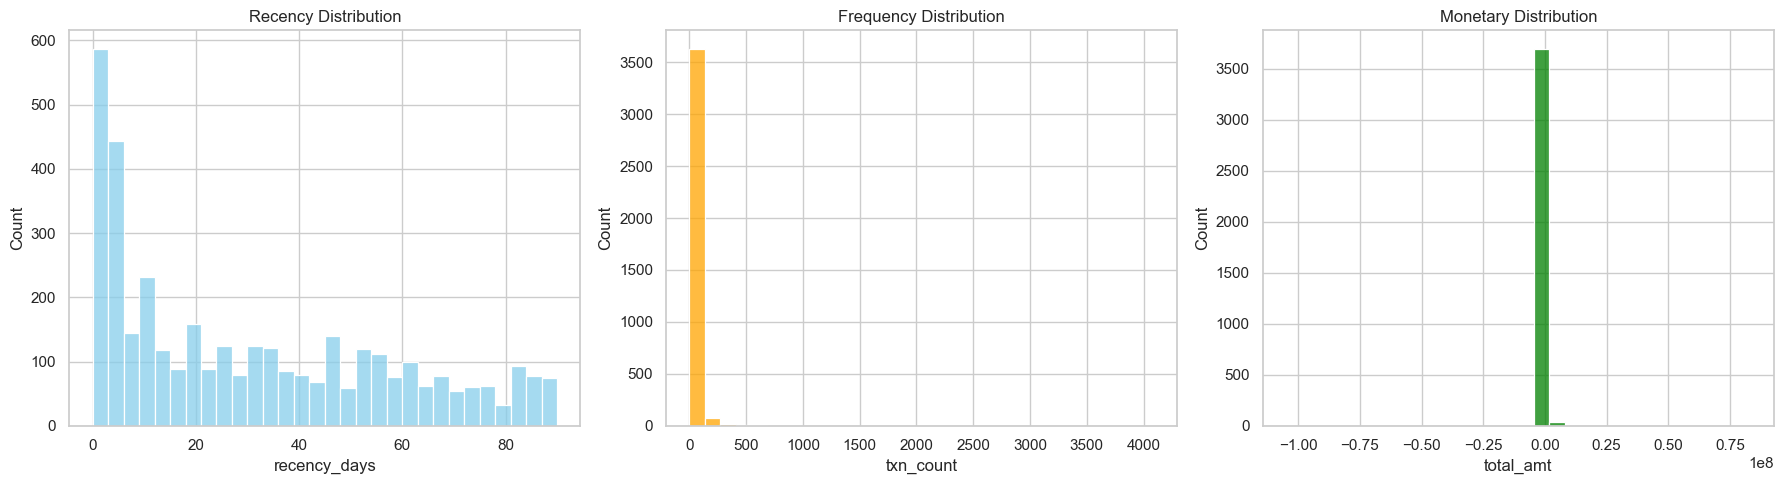

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(customer_summary['recency_days'], bins=30, ax=axs[0], color='skyblue')
axs[0].set_title("Recency Distribution")

sns.histplot(customer_summary['txn_count'], bins=30, ax=axs[1], color='orange')
axs[1].set_title("Frequency Distribution")

sns.histplot(customer_summary['total_amt'], bins=30, ax=axs[2], color='green')
axs[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()

In [41]:
customer_summary.to_csv('../data/processed/customer_rfm.csv', index=False)

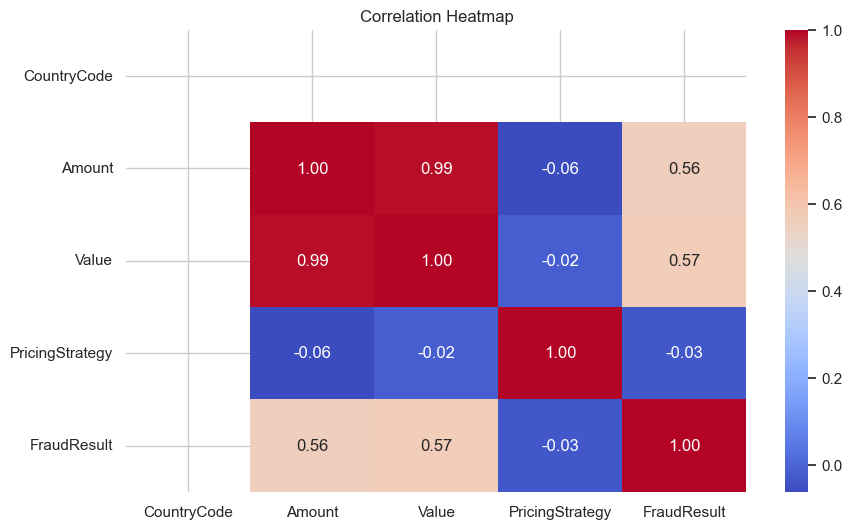

In [42]:
# Only numerical columns
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [45]:
df.select_dtypes(include="number").corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000
